<a href="https://colab.research.google.com/github/OFKadi/Bitirme_Projesi/blob/main/Jupyter_Notebooks/VPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import scipy.integrate as integrate
import scipy.optimize as opt
from scipy.misc import derivative

import scipy.constants
gr = scipy.constants.golden

CPU times: user 4min 11s, sys: 480 ms, total: 4min 11s
Wall time: 4min 11s


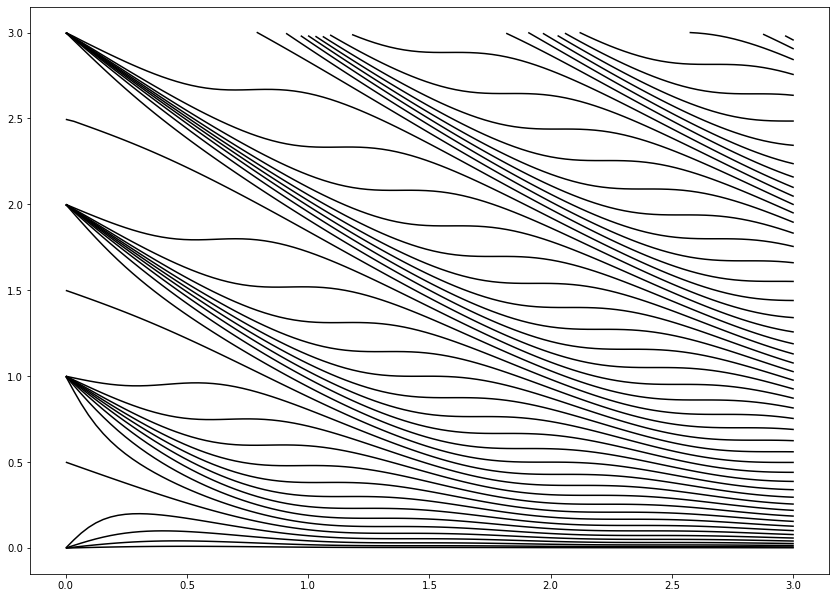

In [3]:
%%time
nn = 100
k_arry = np.linspace(0.01, 3*np.pi, nn)
dq = 0.1*np.pi
q = 0.1*np.pi

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
fig.set_size_inches(18.5, 10.5)

for i in range(51):
  phase = []
  for k in k_arry:
    func = lambda t, y : q**2*np.sin(k*t+y)**2/k
    sol = solve_ivp(func, [0, 1], [0], max_step=0.003, method='DOP853', t_eval=[1])
    phase.append(sol.y[0][0])
  q = q + dq

  phase = np.array(phase)/np.pi
  phase = phase[phase < 3.0]
  
  ax.plot(k_arry[-phase.size:]/np.pi, phase, 'k')

# Square well potential functions

In [5]:
# k=0 parameters: scattering length a_s and effective range r_0

def a_s_W(q0):
    q0=q0+np.spacing(0)
    return 1-np.tan(q0)/q0
    #return 1-np.tan(q0)/(q0+np.finfo(float).eps)
    #return 1-np.tan(q0)/(q0+np.spacing(0))

def r_0_W(q0):
    tq0=np.tan(q0)
    #print(q0,(q0-tq0)**(-2))
    return 1+(3*tq0-q0*(3+q0**2))/(3*q0*(q0-tq0)**2)

def cotδ_num_W(k,q0):
    kp=np.sqrt(k**2+q0**2)
    return kp*np.cos(kp)*np.cos(k)+ k*np.sin(kp)*np.sin(k)

def cotδ_denom_W(k,q0):
    kp=np.sqrt(k**2+q0**2)
    return k*np.sin(kp)*np.cos(k)-kp*np.cos(kp)*np.sin(k)

def kcotδ_W(k,q0):
    kp=np.sqrt(k**2+q0**2)
    return k*cotδ_num_W(k,q0)/cotδ_denom_W(k,q0)

# energy dependent scattering length
def a_E_W(x,q0):
    return -1./kcotδ_W(np.sqrt(x),q0)

def δ_k_W(k,q0):
    kp=np.sqrt(k**2+q0**2)
    return np.arctan2(( k*np.sin(kp)*np.cos(k)-kp*np.cos(kp)*np.sin(k)),
                      (kp*np.cos(kp)*np.cos(k)+ k*np.sin(kp)*np.sin(k))
                      )

In [7]:
#import mp
# k_\pm expressions
def δ_kW(k,q0):
    kpr=np.sqrt(k**2+q0**2)
    kp=kpr+k
    km=kpr-k
#    return mp.atan( ( kp*mp.sin(km)-km*mp.sin(kp) ) / 
#                    ( kp*mp.cos(km)+km*mp.cos(kp) ) 
#                    )
    return np.arctan2( 
                     ( kp*np.sin(km)-km*np.sin(kp) ),  
                     ( kp*np.cos(km)+km*np.cos(kp) ) 
                    )

def a_EW(k,q0):
    kpr=np.sqrt(k**2+q0**2)
    kp=kpr+k
    km=kpr-k
    return    -( kp*np.sin(km)-km*np.sin(kp) ) / \
           ( k*( kp*np.cos(km)+km*np.cos(kp) ) ) 

In [9]:
# bound states
def E_b_W(q0,keps=1.e-4):
    nb=int((q0-np.pi/2)//np.pi)+1
    na=int((q0-np.pi)//np.pi)+2
    κ0s=[]
    if nb==na:
        k1=keps
    else:
        k1=np.sqrt(q0**2-((nb)*np.pi)**2 ) 
        
    for ib in range(nb):
        if ib==nb-1:
            k2=q0
        else:
            k2=np.sqrt(q0**2-((nb-1-ib)*np.pi)**2 ) 
        #print(k1/np.pi,k2/np.pi)
        κ0=opt.brentq(f_E_b_W, (1+keps)*k1, (1-keps)*k2, args=(q0,))
        #print(k1/np.pi,k2/np.pi,κ0/np.pi)
        
        k1=k2
        κ0s.append(κ0)
        
    return np.array(κ0s)

# find zero of the following function for bound state
def f_E_b_W(κ,q0):
    kp = np.sqrt(q0**2-κ**2)
    return κ+kp/np.tan(kp)

In [17]:
# as and r0 of the square well potential
def plot_a_s_W_r_0_W(qq=np.linspace(0,2.3*np.pi,1000), kzero=1e-6, outfile=""):

    fig, ax = plt.subplots(1, 1, figsize=(8*gr,8))

    ax.plot(qq/np.pi,a_s_W(qq),'-',label=r"$a^W_s/R$")
    ax.plot(qq/np.pi,r_0_W(qq),'-.',label=r"$r^W_0/R$")
    #ax.plot(qq/np.pi,δ_kW(kzero,qq),'+',label=r"$\delta^W_{k=0}$")
    ax.plot(qq/np.pi,δ_k_W(kzero,qq),'+',label=r"$\delta^W_{k=0}$")
    ax.plot(qq/np.pi,0*qq,'k--')
    ax.set_xlabel(r"$q_0R/\pi$")
    ax.set_ylim([-2,2])
    ax.set_ylim([-1.05*np.pi,1.05*np.pi])
    ax.legend(loc=3);
    
    color2='#595959'
    color2='#898989'
    
    ax2 = ax.twinx()
    for q0 in qq[::4]:
        κ0s=E_b_W(q0)
        for κ0 in κ0s:
            ax2.plot(q0/np.pi,κ0/np.pi,'.',color=color2)
    ax2.set_ylabel(r"$E_b mR^2/\hbar^2$",rotation=-90, color=color2, labelpad=20)
    ax2.set_ylim([-2,2])
    ax2.tick_params('y', colors=color2)
    #ax2.legend();
    
    fig.tight_layout()
    if outfile:
        fig.savefig('figs/'+outfile)
    pass;

/tmp/ipykernel_42292/3700698933.py:12: RuntimeWarning: invalid value encountered in true_divide
  return 1+(3*tq0-q0*(3+q0**2))/(3*q0*(q0-tq0)**2)


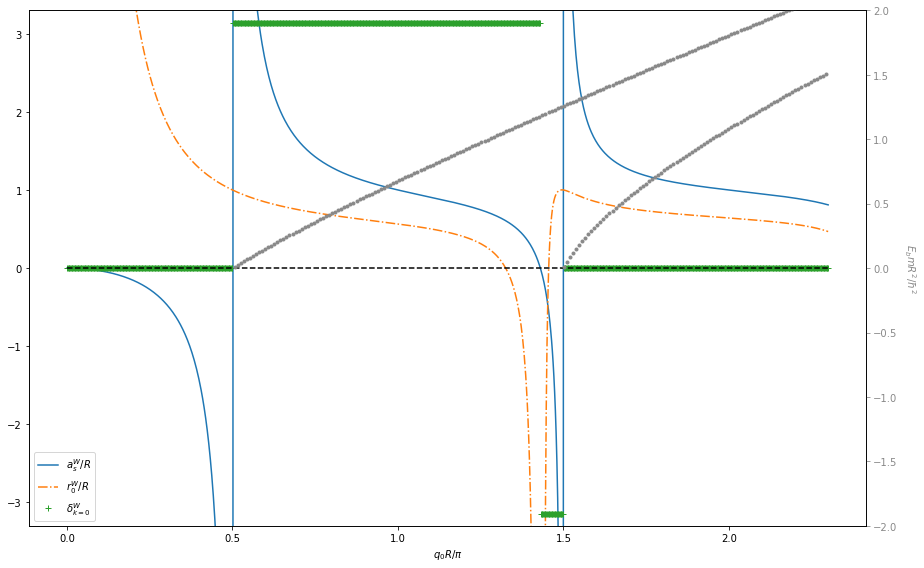

In [18]:
plot_a_s_W_r_0_W(qq=np.linspace(0,2.3*np.pi,1000), kzero=1e-6, outfile="")

# To do:

- extract $a_s$ and $r_0$ from the curve-fitting solution to VPA result 
- add it with points to the above plot